In [104]:
import numpy as np
import random
from random import randint
import statistics
import matplotlib.pyplot as plt

In [105]:
# Parameters

#Size of population
population_size = 100
#String length
length_of_string = 30
#Chance of parent crossover occurring 
crossover_rate = 0.9
#Chance of mutation occurring
mutation_rate = 0.5
#Total generations produced
num_generations = 15
#Array to store averages
averages = []
#Target value of a bit string in the population
target_value = "010011100011001011111100001101"

In [106]:
def genetic_algorithm(population):
    
    #Loop through generations
    for generations in range(num_generations):
        parents = []
        children = []

        #Calculate total fitness scores for the population
        scores = [fitness(x) for x in population]

        averages.append(statistics.fmean(scores))

        #Print scores of current generation
        best_index, best_score = scores.index(max(scores)), max(scores)
        print(f'Generation {generations+1}')
        print(f'Best item: {population[best_index]}')
        print(f'Item score: {best_score}')
        print(f'Generation average score: {averages[generations]}\n')

        # Find parent chromosomes of next generation via selection
        for i in range(population_size):
            parents.append(tournament_selection(population, scores))

        # Pair up chromosome with the one right after it
        for i in range(0, population_size, 2):
            parent_1, parent_2 = parents[i], parents[i+1]

            # Perform crossover, mutate children and append to list
            for child in one_point_crossover(parent_1, parent_2):
                child = mutate(child)
                children.append(child)

        # Replace current generation with children
        population = children
        print(len(averages))

In [107]:
def main():
    # Target of GA is 010011100011001011111100001101
    print(f'Target string is 010011100011001011111100001101')
    
    population = []
    for i in range(population_size):
        chrom = []
        for j in range(length_of_string):
            chrom.append(random.choice("01"))
        population.append(chrom)
        
    population = [''.join(sublist) for sublist in population]
    print(population)
    genetic_algorithm(population)
    plot_averages(averages, num_generations)

Target string is 010011100011001011111100001101
['111101011010011010011000011001', '110110110101000001110011011100', '101011110001100110000100010000', '100111111010010100100101100111', '001111100111010001000110111000', '111110000101101010011111010011', '001110010001101101000101000010', '010010011100001001100011110000', '101001010000101000110111101000', '111111010001100110110000000100', '110001111001000101010010001101', '010101010011011000101010101011', '100011111110100110111011111000', '101111001001111111001111100010', '001010010110001010100000000001', '111111100100100101011100001010', '001101001010001001101111110101', '011111010000101011110100001110', '011011100011001010110111110110', '111101100001110110101011011101', '010011100001010000011100011011', '000000110001001110001011000101', '100101000001100111000101011001', '001110010011000011010111111011', '001100100011010001001111110110', '001001110001000111101011111011', '000001001001100101000100110100', '000010010111101101000101000001',

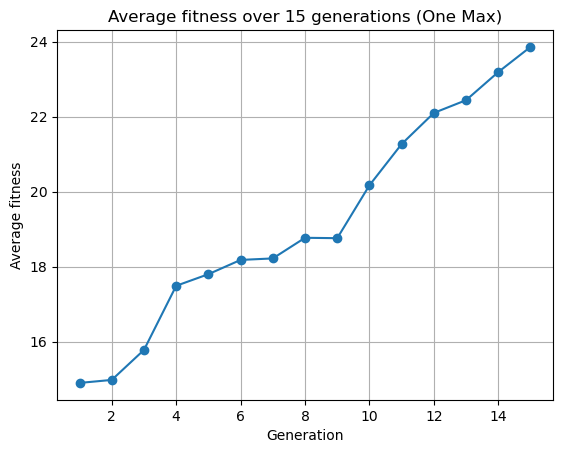

In [108]:
main()

In [87]:
import numpy as np

def fitness(bitstring):
    fitness = 0
    
    for i in range(len(bitstring)):
        
        if bitstring[i] == target_value[i]:
            fitness += 1
    

    return fitness

In [86]:
mutation_rate = 0.4

def mutate(bit_string):

    random_index = random.randint(0, 29)
    bit_string = list(bit_string)

    if np.random.rand() < mutation_rate:
        
        if bit_string[random_index] == '0':
            bit_string[random_index] = '1' 
                      
    return ''.join(bit_string)

In [85]:
def one_point_crossover(parent1, parent2):
    
    
    crossover_point = random.randint(0, len(parent1))
    offspring1 = parent1[:crossover_point] + parent2[crossover_point:]
    offspring2 = parent2[:crossover_point] + parent2[crossover_point:]
    
    return offspring1, offspring2

In [84]:
parent1 = '110101010110110010010101011001'
parent2 = '001110011011010100111101000101'

offspring1, offspring2 = one_point_crossover(parent1, parent2)
print("Offspring 1:", offspring1)
print("Offspring 2:", offspring2)

Offspring 1: 110101010110110010010101000101
Offspring 2: 001110011011010100111101000101


In [83]:
def tournament_selection(population, scores, rounds=5):
    # Pick some random index in population
    best_chrom = random.randint(0, population_size-1)
    
    #Choose opposing individuals randomly
    for chrom in range(rounds+1):
        chrom_index = random.randint(0, population_size-1)
        
        # Find best score in tournament round
        if scores[chrom_index] > scores[best_chrom]:
            best_chrom = chrom
    return population[best_chrom]

In [100]:
def plot_averages(averages, generations):
    print("Length of averages:", len(averages))
    print("Length of generations:", generations)
    plt.plot(range(1, generations+1), averages, marker='o')
    plt.title(f'Average fitness over {generations} '
              'generations (One Max)')
    plt.xlabel('Generation')
    plt.ylabel('Average fitness')
    plt.grid(True)
    plt.show()
    
    